# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
<br>
</a>
<a href="https://www.paypal.com/ncp/payment/GN55W4UQ7VAMN" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button2.png" height="40" />
</div>
</a>

<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 2: Portfolio Optimization using Risk Factors and Stepwise Regression

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  30 of 30 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6779%,0.1634%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1376%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios

### 2.1 Estimating the loadings matrix.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix.

In [3]:
import riskfolio as rp

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = rp.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6551,0.0000,0.9406,-0.7883,1.7237
BA,0.0005,0.0000,1.1743,0.3616,-0.4322,0.0000
BAX,0.0003,0.3146,0.0000,0.0000,0.7717,0.0000
BMY,-0.0003,0.0000,0.8123,0.0000,0.0000,0.0000
CMCSA,0.0001,0.0000,0.4958,0.0000,0.4962,0.0000
CNP,0.0001,-0.5595,-0.2157,0.0000,1.8341,0.0000
CPB,-0.0003,-0.4782,-0.5993,0.0000,2.0794,0.0000
DE,0.0004,0.0000,0.0000,0.3631,0.0000,0.8090
HPQ,0.0002,0.0000,0.0000,0.0000,0.0000,1.2514
JCI,0.0001,0.0000,0.0000,0.3411,0.0000,0.5797


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.alpha = 0.05
model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.9508%,11.8693%,0.0000%,0.0000%,9.7095%,0.0000%,4.3626%,0.0000%,0.0000%,...,10.4804%,0.0000%,0.0000%,0.0000%,0.0000%,5.5105%,1.2994%,0.0000%,4.0980%,0.0000%


### 2.3 Plotting portfolio composition

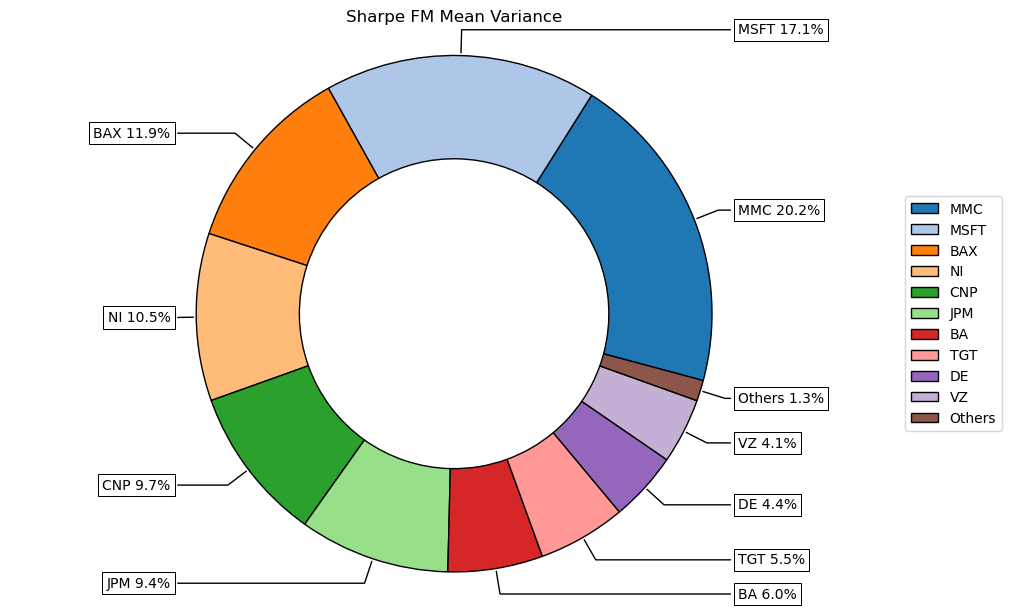

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, 
                 title='Sharpe FM Mean Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,1.9923%,4.4201%,3.5982%,8.4948%,5.0090%,0.0000%,0.0000%,4.4337%,...,12.0939%,0.0000%,13.3200%,1.0089%,8.3012%,4.0840%,0.0000%,0.0000%,10.3133%,1.6679%
1,0.0000%,1.6592%,6.2598%,1.2538%,3.4250%,10.4168%,3.1168%,0.3979%,0.0000%,2.5872%,...,13.7064%,0.0000%,7.7372%,0.0000%,6.7064%,4.9333%,0.0000%,0.0000%,10.5789%,1.6512%
2,0.0000%,2.3021%,7.3159%,0.0000%,3.0349%,11.1002%,2.4076%,0.9813%,0.0000%,1.6503%,...,14.3023%,0.0000%,5.5453%,0.0000%,6.0226%,5.1518%,0.0000%,0.0000%,10.6638%,1.4139%
3,0.0000%,2.8526%,8.2126%,0.0000%,2.5289%,11.5852%,1.6264%,1.4956%,0.0000%,0.6297%,...,14.6706%,0.0000%,3.1897%,0.0000%,5.2023%,5.3155%,0.0739%,0.0000%,10.5636%,1.1082%
4,0.0000%,3.3061%,8.9459%,0.0000%,2.0093%,11.9270%,0.8759%,1.9173%,0.0000%,0.0000%,...,14.8951%,0.0000%,0.9660%,0.0000%,4.3808%,5.4379%,0.4384%,0.0000%,10.3772%,0.7800%


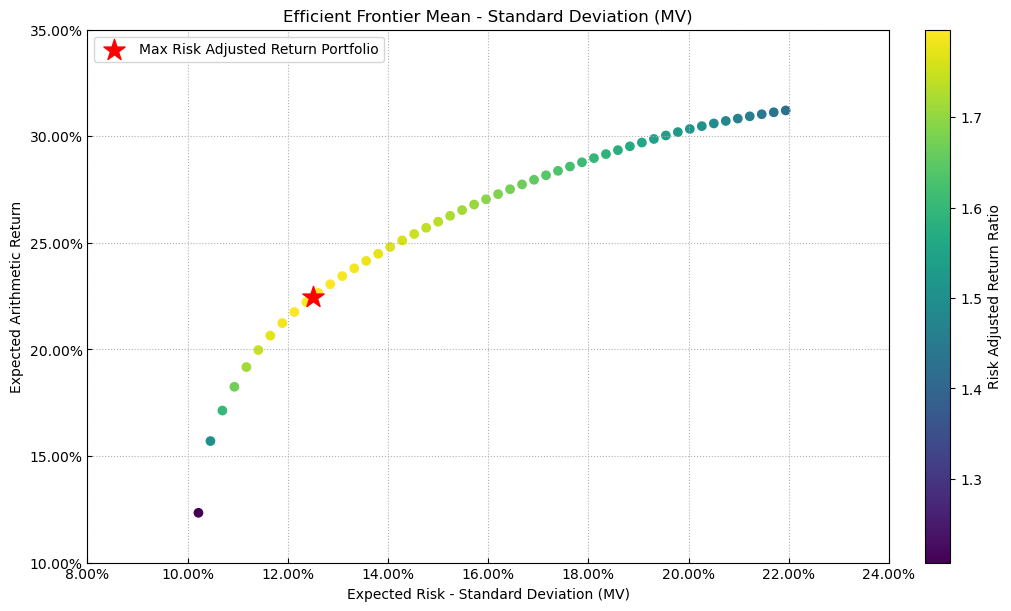

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=rf,
                      alpha=0.05,
                      cmap='viridis',
                      w=w, label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      ax=None)

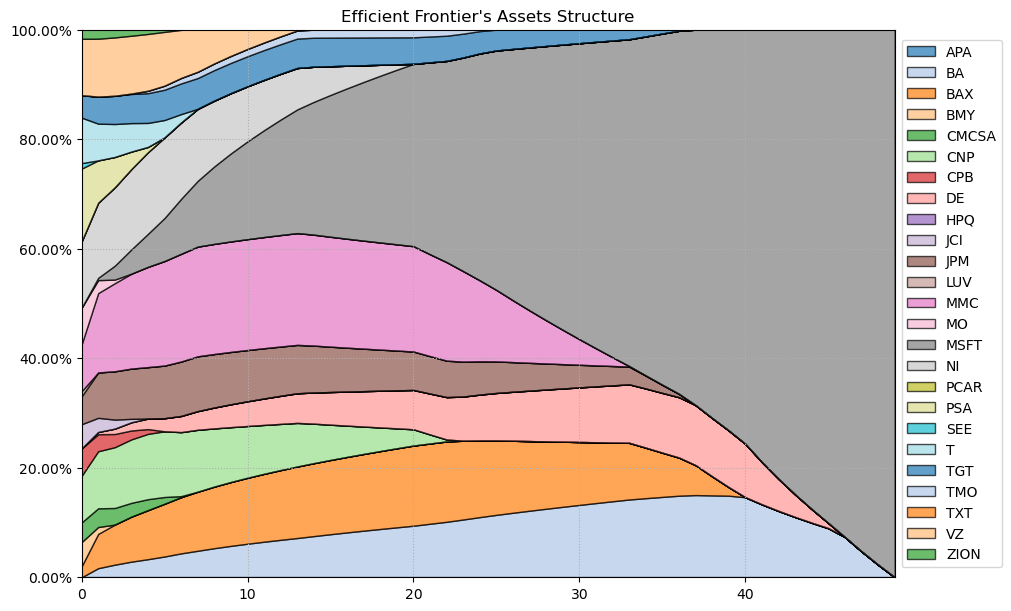

In [8]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Optimization with Constraints on Risk Factors

### 3.1 Statistics of Risk Factors

In [9]:
# Displaying factors statistics

display(loadings.min())
display(loadings.max())
display(X.corr())

const    -0.0583%
MTUM    -65.5110%
QUAL    -59.9340%
SIZE    -28.9787%
USMV    -82.0331%
VLUE    -49.1498%
dtype: float64

const     0.0504%
MTUM    103.0217%
QUAL    117.4335%
SIZE     94.0620%
USMV    232.5696%
VLUE    172.3667%
dtype: float64

,MTUM,QUAL,SIZE,USMV,VLUE
MTUM,100.0000%,90.4265%,79.1171%,87.2321%,78.5394%
QUAL,90.4265%,100.0000%,89.8167%,89.9553%,91.6580%
SIZE,79.1171%,89.8167%,100.0000%,82.5078%,87.9111%
USMV,87.2321%,89.9553%,82.5078%,100.0000%,76.9678%
VLUE,78.5394%,91.6580%,87.9111%,76.9678%,100.0000%


### 3.2 Creating Constraints on Risk Factors

In [10]:
# Creating risk factors constraints

constraints = {'Disabled': [False, False, False, False, False],
               'Factor': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE'],
               'Sign': ['<=', '<=', '<=', '>=', '<='],
               'Value': [-0.3, 0.8, 0.4, 0.8 , 0.9],
               'Relative Factor': ['', 'USMV', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Factor,Sign,Value,Relative Factor
0,False,MTUM,<=,-30.0000%,
1,False,QUAL,<=,80.0000%,USMV
2,False,SIZE,<=,40.0000%,
3,False,USMV,>=,80.0000%,
4,False,VLUE,<=,90.0000%,


In [11]:
C, D = rp.factors_constraints(constraints, loadings)

In [12]:
port.ainequality = C
port.binequality = D

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.5843%,1.4886%,0.0000%,0.0000%,17.4861%,0.0000%,4.0877%,0.0000%,0.0000%,...,13.9658%,1.3795%,0.0000%,0.0000%,0.3010%,4.4149%,0.0000%,0.0000%,10.5794%,2.0949%


To check if the constraints are verified, I will make a regression among the portfolio returns and risk factors:

In [13]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
y = np.matrix(returns) * np.matrix(w)
results = sm.OLS(y, X1).fit()
coefs = results.params

print(coefs)

const     0.0229%
MTUM    -30.0000%
QUAL     15.3044%
SIZE      1.7752%
USMV     92.6891%
VLUE     21.9819%
dtype: float64


### 3.3 Plotting portfolio composition

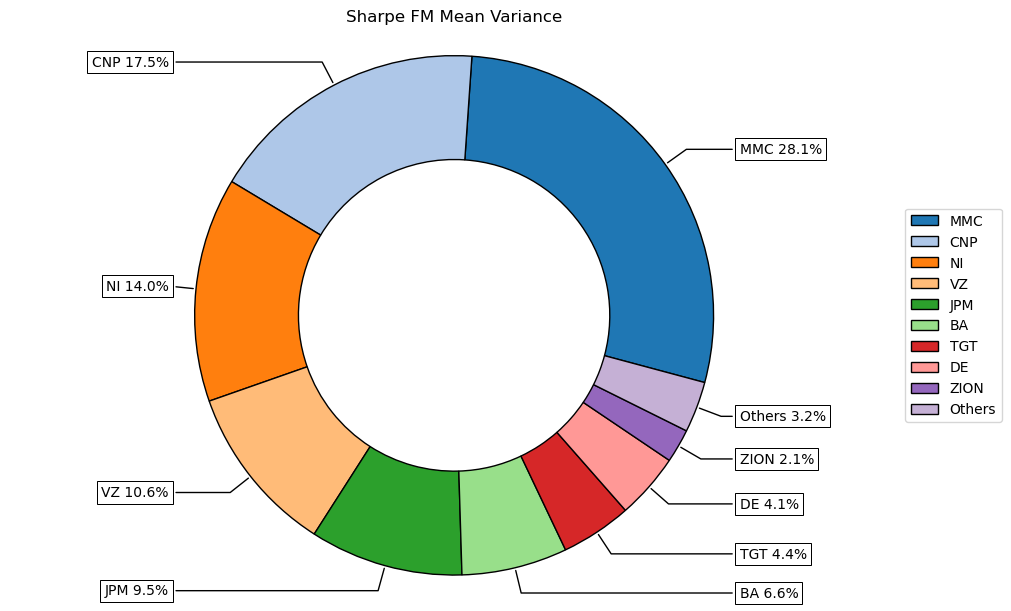

In [14]:
ax = rp.plot_pie(w=w,
                 title='Sharpe FM Mean Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 3.4 Calculate efficient frontier

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,2.0863%,0.0000%,6.2154%,4.1098%,7.4108%,3.2332%,0.0000%,0.0000%,3.5747%,...,8.0639%,5.3185%,13.3121%,0.6673%,5.8689%,3.7826%,0.0000%,0.0001%,6.1361%,2.0922%
1,0.0000%,3.5698%,0.4915%,3.1979%,3.7576%,9.8306%,2.2442%,0.0000%,0.0000%,2.1373%,...,10.6347%,4.1695%,8.9258%,0.0000%,5.4960%,4.4494%,0.0000%,0.0000%,7.7790%,2.1893%
2,0.0000%,4.0945%,1.2791%,1.8899%,3.3737%,10.9021%,1.8036%,0.0000%,0.0000%,1.3399%,...,11.5280%,4.0626%,7.0366%,0.0000%,5.3393%,4.6104%,0.0000%,0.0000%,8.4167%,2.2660%
3,0.0000%,4.5028%,1.8932%,0.8718%,3.0741%,11.7364%,1.4604%,0.0000%,0.0000%,0.7188%,...,12.2234%,3.9800%,5.5655%,0.0000%,5.2174%,4.7356%,0.0000%,0.0000%,8.9132%,2.3255%
4,0.0000%,4.8302%,2.3447%,0.0192%,2.8068%,12.4328%,1.1719%,0.2475%,0.0000%,0.1765%,...,12.7975%,3.9118%,4.3444%,0.0000%,5.1040%,4.8279%,0.0000%,0.0000%,9.3171%,2.3490%


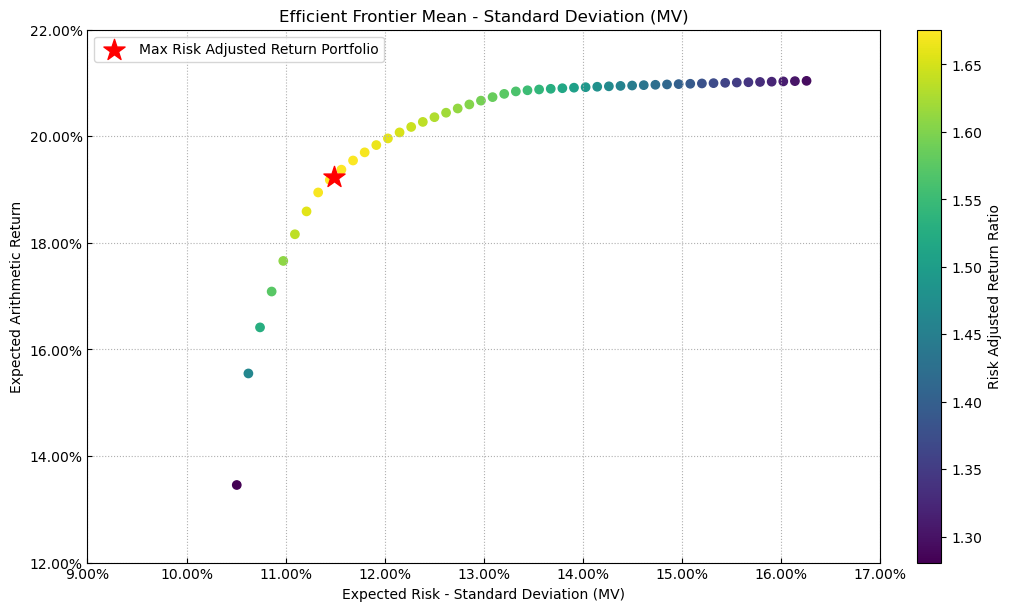

In [16]:
# Plotting efficient frontier composition

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=rf,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      ax=None)

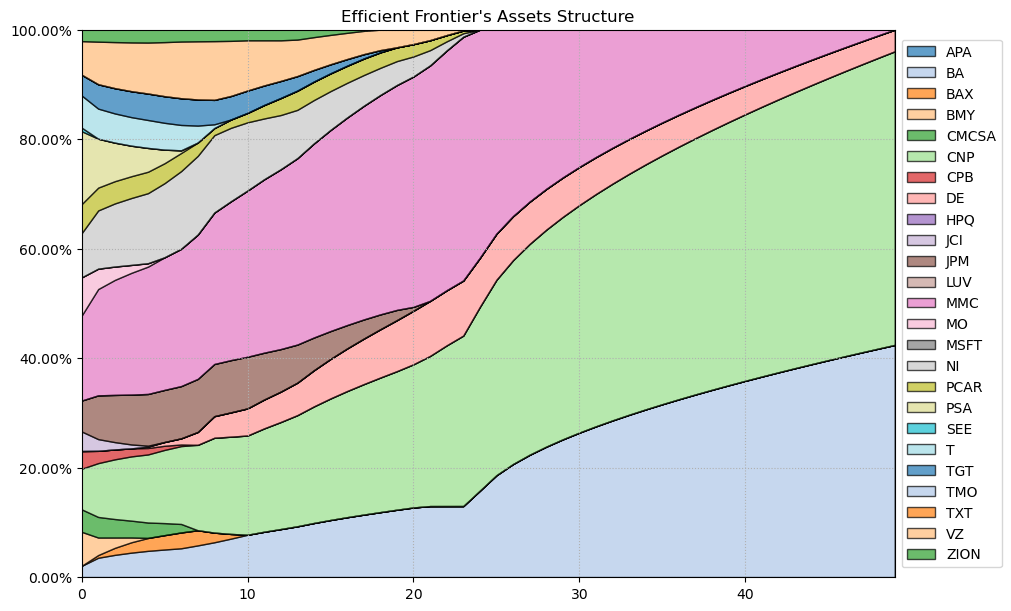

In [17]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [18]:
display(returns)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
2016-01-05,-0.6212%,0.0684%,0.7015%,0.1909%,0.4771%,0.9282%,0.9911%,0.1761%,0.2252%,0.1002%,...,1.1711%,-0.1121%,0.8781%,0.3501%,0.6946%,0.1709%,0.5662%,-0.2138%,0.9752%,-0.3551%
2016-01-06,-2.8767%,-1.2757%,-0.6188%,-0.9939%,-0.8927%,-0.5877%,-0.3663%,-1.6300%,-2.2664%,-1.2376%,...,-0.0188%,-2.1654%,-0.0371%,-1.3275%,-1.3599%,-1.3348%,-1.0116%,-1.8914%,-0.9194%,-2.5117%
2016-01-07,-2.6604%,-2.6675%,-1.9233%,-1.9592%,-1.9763%,-1.2059%,-0.9113%,-2.3281%,-2.6834%,-1.8334%,...,-0.8785%,-2.6708%,-1.0104%,-1.9322%,-1.3673%,-1.5868%,-2.5264%,-2.5834%,-1.1151%,-2.2578%
2016-01-08,-1.6386%,-1.2855%,-1.0493%,-0.9502%,-1.0563%,-1.0629%,-0.9909%,-1.2707%,-1.3400%,-1.0335%,...,-0.9977%,-1.3239%,-0.9137%,-1.2707%,-0.9353%,-0.7749%,-1.2535%,-1.3153%,-0.9452%,-1.1137%
2016-01-11,-2.1923%,-0.0563%,0.3346%,0.0940%,0.1556%,-0.0892%,-0.0996%,-0.6705%,-0.7531%,-0.5542%,...,0.2115%,-0.7574%,0.3162%,-0.5897%,-0.4231%,-0.4203%,0.3350%,-0.8259%,-0.1979%,-1.4464%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.9709%,0.6528%,0.7567%,0.4352%,0.6099%,0.6594%,0.6197%,0.9430%,1.0747%,0.6983%,...,0.5968%,0.7454%,0.4033%,0.7249%,0.7672%,0.6842%,0.7894%,0.7581%,0.7437%,0.9396%
2019-12-23,0.6972%,0.2477%,-0.4230%,-0.0181%,-0.1988%,-0.5600%,-0.7398%,0.1197%,0.1322%,0.0606%,...,-0.8528%,0.4842%,-0.6862%,-0.1714%,-0.3171%,0.1147%,-0.2473%,0.3183%,-0.5772%,0.6377%
2019-12-24,-0.1966%,0.0028%,0.1506%,-0.0503%,0.0391%,0.0930%,0.1005%,0.0557%,-0.0071%,0.0206%,...,0.1566%,-0.1185%,0.0727%,-0.0239%,0.0208%,0.0305%,0.0896%,-0.0882%,0.0777%,-0.0759%
2019-12-26,0.0838%,0.3934%,0.3568%,0.2717%,0.3344%,0.2787%,0.1966%,0.3100%,0.3689%,0.2053%,...,0.2525%,0.3537%,0.2093%,0.2124%,0.2761%,0.2577%,0.4285%,0.2202%,0.2812%,0.2258%


## 4. Estimating Portfolios Using Risk Factors with Other Risk Measures

In this part I will calculate optimal portfolios for several risk measures. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 4.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [19]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [20]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.58%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,1.49%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,17.49%,40.05%,40.05%,40.05%,40.05%,40.05%,40.05%,43.17%,0.00%,40.05%,23.94%,40.05%,40.05%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,4.09%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

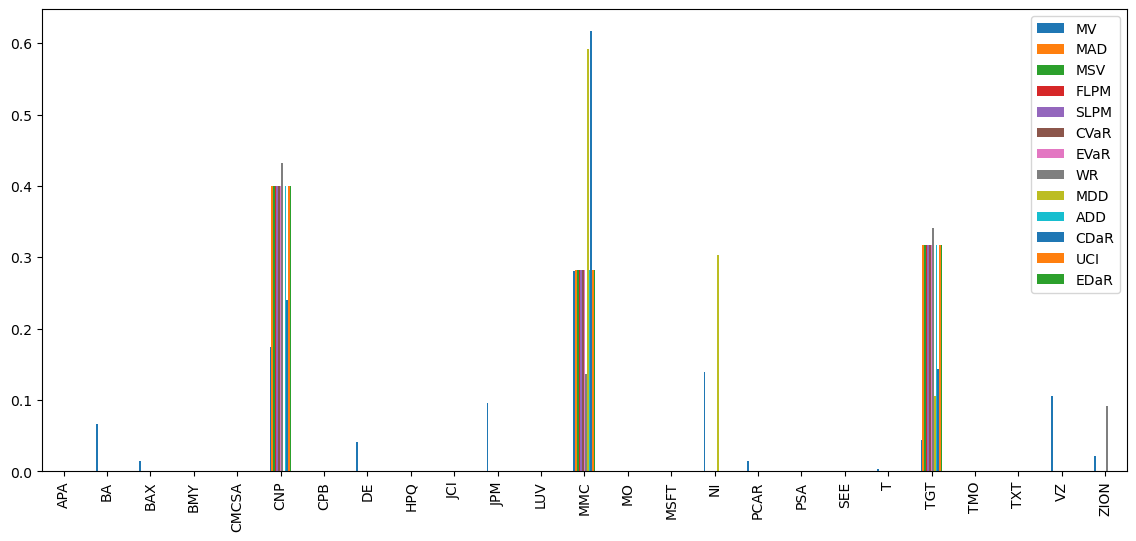

In [21]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [22]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [23]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,7.45%,7.00%,8.25%,6.48%,8.43%,8.52%,8.45%,0.00%,7.95%,14.01%,16.29%,15.08%,8.71%
BAX,1.03%,1.30%,0.36%,0.95%,0.22%,3.48%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,17.82%,13.25%,17.50%,12.81%,17.98%,21.30%,31.82%,29.80%,54.49%,11.75%,27.54%,16.60%,44.55%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.30%,7.20%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.77%,1.98%,2.68%,2.93%,2.82%,3.09%,1.67%,0.00%,5.75%,0.07%,0.00%,1.08%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

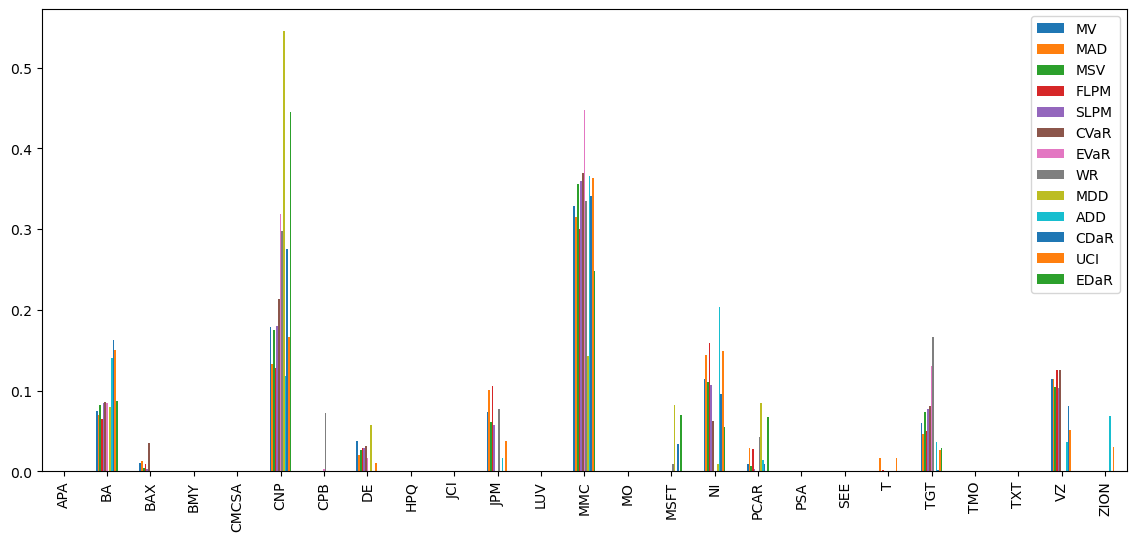

In [24]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)